# Project 2: Topic Classification

In this project, you'll work with text data from newsgroup posts on a variety of topics. You'll train classifiers to distinguish posts by topics inferred from the text. Whereas with digit classification, where each input is relatively dense (represented as a 28x28 matrix of pixels, many of which are non-zero), here each document is relatively sparse (represented as a bag-of-words). Only a few words of the total vocabulary are active in any given document. The assumption is that a label depends only on the count of words, not their order.

The `sklearn` documentation on feature extraction may be useful:
http://scikit-learn.org/stable/modules/feature_extraction.html

Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on Slack, but <b> please prepare your own write-up with your own code. </b>

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

import nltk

Load the data, stripping out metadata so that only textual features will be used, and restricting documents to 4 specific topics. By default, newsgroups data is split into training and test sets, but here the test set gets further split into development and test sets.  (If you remove the categories argument from the fetch function calls, you'd get documents from all 20 topics.)

In [2]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test  = fetch_20newsgroups(subset='test',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)

num_test = int(len(newsgroups_test.target) / 2)
test_data, test_labels   = newsgroups_test.data[num_test:], newsgroups_test.target[num_test:]
dev_data, dev_labels     = newsgroups_test.data[:num_test], newsgroups_test.target[:num_test]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print('training label shape:', train_labels.shape)
print('dev label shape:',      dev_labels.shape)
print('test label shape:',     test_labels.shape)
print('labels names:',         newsgroups_train.target_names)

training label shape: (2034,)
dev label shape: (676,)
test label shape: (677,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


### Part 1:

For each of the first 5 training examples, print the text of the message along with the label.

In [7]:
def P1(num_examples=5):
    """Function to print the text of the message along with the label
    
    PARAMETERS: 
    - num_examples - int, number of examples to print
    
    RETURNS: 
    - Not applicable
    """
    ### STUDENT START ###
    for example in range(num_examples):
        print('Example: ' + str(example+1))
        print('Label:' + str(train_labels[example]))       
        print('Message: '+ str(train_data[example]))       
        print('******************')   
    ### STUDENT END ###

P1(5)

Example: 1
Label:1
Message: Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych
******************
Example: 2
Label:3
Message: 

Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil corruption
f

### Part 2:

Transform the training data into a matrix of word unigram feature vectors.  What is the size of the vocabulary? What is the average number of non-zero features per example?  What is the fraction of the non-zero entries in the matrix?  What are the 0th and last feature strings (in alphabetical order)?<br/>
_Use `CountVectorization` and its `.fit_transform` method.  Use `.nnz` and `.shape` attributes, and `.get_feature_names` method._

Now transform the training data into a matrix of word unigram feature vectors using your own vocabulary with these 4 words: ["atheism", "graphics", "space", "religion"].  Confirm the size of the vocabulary. What is the average number of non-zero features per example?<br/>
_Use `CountVectorization(vocabulary=...)` and its `.transform` method._

Now transform the training data into a matrix of character bigram and trigram feature vectors.  What is the size of the vocabulary?<br/>
_Use `CountVectorization(analyzer=..., ngram_range=...)` and its `.fit_transform` method._

Now transform the training data into a matrix of word unigram feature vectors and prune words that appear in fewer than 10 documents.  What is the size of the vocabulary?<br/>
_Use `CountVectorization(min_df=...)` and its `.fit_transform` method._

Now again transform the training data into a matrix of word unigram feature vectors. What is the fraction of words in the development vocabulary that is missing from the training vocabulary?<br/>
_Hint: Build vocabularies for both train and dev and look at the size of the difference._

Notes:
* `.fit_transform` makes 2 passes through the data: first it computes the vocabulary ("fit"), second it converts the raw text into feature vectors using the vocabulary ("transform").
* `.fit_transform` and `.transform` return sparse matrix objects.  See about them at http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html. 

In [15]:
def P2():
    """Transform the training data using vectorizer
    
    PARAMETERS: 
    - Not applicable
    
    RETURNS: 
    - Not applicable
    """
    ### STUDENT START ###
    
    ########
    # Matrix of word unigram feature vectors
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(train_data)
    
    # Size of the vocabulary
    print('Size of the vocabulary: ',np.shape(X)[1])
    # Average number of non-zero features per example
    print('Average number of non-zero features per example: ', round(X.nnz / X.shape[0],2))
    # Fraction of the non-zero entries in the matrix
    print('Fraction of the non-zero entries in the matrix: '+ str(round(X.nnz*100 / (X.shape[0]*X.shape[1]),2))+'%')
    
    # 0th and last feature strings (in alphabetical order)
    print('0th Feature: ',vectorizer.get_feature_names()[0])
    print('Last Feature: ', vectorizer.get_feature_names()[-1])
    
    #########
    # Matrix of word unigram feature vectors 
    # using your own vocabulary with these 4 words ["atheism", "graphics", "space", "religion"]
    my_vocabulary = ["atheism", "graphics", "space", "religion"]
    vectorizer_unigram = CountVectorizer(vocabulary=my_vocabulary)
    X_unigram = vectorizer_unigram.fit_transform(train_data)
    
    # Size of the vocabulary
    print('Size of the UNIGRAM vocabulary: ',np.shape(X_unigram)[1])
    # Average number of non-zero features per example
    print('Average number of non-zero features per example: ', round(X_unigram.nnz / X_unigram.shape[0],2))   
    
    #########
    # Matrix of character bigram and trigram feature vectors
    
    # BIGRAM
    vectorizer_bigram = CountVectorizer(analyzer='char', ngram_range=(2,2))
    X_bigram = vectorizer_bigram.fit_transform(train_data)
    # Size of the vocabulary
    print('Size of the BIGRAM vocabulary: ',np.shape(X_bigram)[1])
    
    #TRIGRAM
    vectorizer_trigram = CountVectorizer(analyzer='char', ngram_range=(3,3))
    X_trigram = vectorizer_trigram.fit_transform(train_data)
    # Size of the vocabulary
    print('Size of the TRIGRAM vocabulary: ',np.shape(X_trigram)[1])
    
    #########
    # Matrix of word unigram feature vectors and prune words that appear in fewer than 10 documents
    vectorizer_prune = CountVectorizer(min_df=10)
    X_prune = vectorizer_prune.fit_transform(train_data)
    
    # Size of the vocabulary
    print('Size of the prune word vocabulary: ',np.shape(X_prune)[1])
    
    #########
    # Matrix of word unigram feature vectors. 
    # Fraction of words in the development vocabulary that is missing from the training vocabulary
    
    vocabulary_train = vectorizer.vocabulary_
    
    X_dev = vectorizer.fit_transform(dev_data)
    vocabulary_dev = vectorizer.vocabulary_
    
    diff = set(vocabulary_dev.keys()).difference(set(vocabulary_train.keys()))
    
    print('Fraction of words in the dev vocabulary that is missing from the train vocabulary: '+ str(round(len(diff)/len(vocabulary_dev)*100,2))+'%' )
    
    ### STUDENT END ###

P2()

Size of the vocabulary:  26879
Average number of non-zero features per example:  96.71
Fraction of the non-zero entries in the matrix: 0.36%
0th Feature:  00
Last Feature:  zyxel
Size of the UNIGRAM vocabulary:  4
Average number of non-zero features per example:  0.27
Size of the BIGRAM vocabulary:  3291
Size of the TRIGRAM vocabulary:  32187
Size of the prune word vocabulary:  3064
Fraction of words in the dev vocabulary that is missing from the train vocabulary: 24.79%


### Part 3:

Transform the training and development data to matrices of word unigram feature vectors.

1. Produce several k-Nearest Neigbors models by varying k, including one with k set to optimize f1 score.  For each model, show the k value and f1 score.
1. Produce several Naive Bayes models by varying smoothing (alpha), including one with alpha set approximately to optimize f1 score.  For each model, show the alpha value and f1 score.
1. Produce several Logistic Regression models by varying L2 regularization strength (C), including one with C set approximately to optimize f1 score.  For each model, show the C value, f1 score, and sum of squared weights for each topic.

* Why doesn't k-Nearest Neighbors work well for this problem?
* Why doesn't Logistic Regression work as well as Naive Bayes does?
* What is the relationship between logistic regression's sum of squared weights vs. C value?

Notes:
* Train on the transformed training data.
* Evaluate on the transformed development data.
* You can use `CountVectorizer` and its `.fit_transform` and `.transform` methods to transform data.
* You can use `KNeighborsClassifier(...)` to produce a k-Nearest Neighbors model.
* You can use `MultinomialNB(...)` to produce a Naive Bayes model.
* You can use `LogisticRegression(C=..., solver="liblinear", multi_class="auto")` to produce a Logistic Regression model.
* You can use `LogisticRegression`'s `.coef_` method to get weights for each topic.
* You can use `metrics.f1_score(..., average="weighted")` to compute f1 score.

In [46]:
import pandas as pd

def P3():
    """Transform the training and development data to matrices of word unigram feature vectors
    and produce and evaluate KNN, Naive Bayes and Logistic Regression models
    
    PARAMETERS: 
    - Not applicable
    
    RETURNS: 
    - Not applicable
    """
    
    ### STUDENT START ###
    
    # Default CountVectorizer options
    vectorizer = CountVectorizer()
    X_train = vectorizer.fit_transform(train_data)
    X_dev = vectorizer.transform(dev_data)
    
    # initialize lists
    data_knn = []
    data_NB = []
    data_LG = []
    
    #######
    # Produce k-Nearest Neigbors model

    k_value = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 50, 75, 90, 95, 100]
    for k in k_value:
        # Fit Knn Model
        knn_model = KNeighborsClassifier(n_neighbors=k)
        knn_model.fit(X_train, train_labels)

        # Calculate f score
        predictions = knn_model.predict(X_dev)
        f_score = metrics.f1_score(dev_labels, predictions, average='weighted')
    
        data_knn.append([k,f_score])
        
    df_knn = pd.DataFrame(data_knn,columns=['K Value','F Score'])
    print(df_knn)
    
    #######
    # Produce Naive Bayes model
    alphas = [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]
    for a in alphas:
        # Fit Knn Model
        NB_model = MultinomialNB(alpha = a)
        NB_model.fit(X_train, train_labels)
        
        # Calculate f score
        predictions = NB_model.predict(X_dev)
        f_score = metrics.f1_score(dev_labels, predictions, average='weighted')
    
        data_NB.append([a,f_score])
        
    df_NB = pd.DataFrame(data_NB,columns=['Alpha','F Score'])
    print(df_NB)       
    
    #######
    # Produce Logistic Regression model    
    c_values = [0.001, 0.01, 0.1, 1.0, 2.0, 10.0]
    for c in c_values:
        LR_model = LogisticRegression(C=c, solver="liblinear", multi_class="auto")
        LR_model.fit(X_train, train_labels)
            
        # Calculate f score
        predictions = LR_model.predict(X_dev)
        f_score = metrics.f1_score(dev_labels, predictions, average='weighted')
        
        # Calculate sum of squared weights
        weights = np.round(np.square(LR_model.coef_).sum(axis=1),2)
        
        data_LG.append([c,f_score, weights])
        
    df_LG = pd.DataFrame(data_LG,columns=['C','F Score', 'Sum of squared weights'])
    print(df_LG)  
    
    ### STUDENT END ###

P3()

    K Value   F Score
0         1  0.380503
1         2  0.380542
2         3  0.408415
3         4  0.403123
4         5  0.428761
5         6  0.446665
6         7  0.450479
7         8  0.446984
8         9  0.436567
9        10  0.427850
10       15  0.432634
11       20  0.424342
12       25  0.416106
13       50  0.417632
14       75  0.437888
15       90  0.451898
16       95  0.453282
17      100  0.442240
     Alpha   F Score
0   0.0001  0.762835
1   0.0010  0.770252
2   0.0100  0.775166
3   0.1000  0.790305
4   0.5000  0.786286
5   1.0000  0.777732
6   2.0000  0.768997
7  10.0000  0.667481
        C   F Score            Sum of squared weights
0   0.001  0.619305           [0.17, 0.2, 0.18, 0.19]
1   0.010  0.664700          [2.54, 2.94, 2.86, 2.25]
2   0.100  0.696624      [27.13, 24.66, 27.46, 23.02]
3   1.000  0.696086  [166.95, 130.88, 157.99, 145.79]
4   2.000  0.692483  [257.59, 197.98, 239.77, 226.53]
5  10.000  0.686478   [586.05, 448.88, 539.7, 530.66]


QUESTION: Why doesn't k-Nearest Neighbors work well for this problem?

ANSWER: Because of the high number of features and the sparse character of the data. Furhermore, the weight of each word is the same when computing the distance to its neighbours, therefore words such as 'the', 'and' further reduce the overall score.

QUESTION: Why doesn't Logistic Regression work as well as Naive Bayes does?

ANSWER: Contributing factors:
1. Small sample size is likely to be one of the reasons for Naive Bayes to outperform Logistic Regression. 
2. Naive Bayes assumes independence of each feature, while Logistic regression looks for a linear relationship between features.
3. The data set has a high number of features and Naive Bayes model is designed to handle multi-class discrete data well while Logistic regression performs really well on boolean data classification.

QUESTION: What is the relationship between logistic regression's sum of squared weights vs. C value?

ANSWER: With higher C the coefficients are larger and the sum of the squares increases. This is because C is inversely related to regularization and the sum of squared weights is inversely correlated with the regularization parameter.

### Part 4:

Transform the data to a matrix of word **bigram** feature vectors.  Produce a Logistic Regression model.  For each topic, find the 5 features with the largest weights (that's 20 features in total).  Show a 20 row (features) x 4 column (topics) table of the weights.

Do you see any surprising features in this table?

Notes:
* Train on the transformed training data.
* You can use `CountVectorizer` and its `.fit_transform` method to transform data.
* You can use `LogisticRegression(C=0.5, solver="liblinear", multi_class="auto")` to produce a Logistic Regression model.
* You can use `LogisticRegression`'s `.coef_` method to get weights for each topic.
* You can use `np.argsort` to get indices sorted by element value. 

In [85]:
def P4():
    """Transform the training and development data to matrices of word bigram feature vectors
    Produce a Logistic Regression Model and show top 5 feature weights for 4 topics
    
    PARAMETERS: 
    - Not applicable
    
    RETURNS: 
    - Not applicable
    """
    
    ### STUDENT START ###
    
    # Transform training data
    vectorizer_bigram = CountVectorizer(ngram_range=(2,2))
    X_bigram_train = vectorizer_bigram.fit_transform(train_data)
    
    vocabulary = np.array(vectorizer_bigram.get_feature_names())
    
    # Train Logistic Regression Model
    LR_model = LogisticRegression(C=0.5, solver="liblinear", multi_class="auto")
    LR_model.fit(X_bigram_train,train_labels)
    
    # Get weights for each topic
    feature_weights = LR_model.coef_

    # Find the 5 features with the largest weights
    largest_weights = []
    
    for topic in feature_weights:
        
        # Get indices sorted by element value
        indices = [x for x in np.argsort(topic)[-5:]]
        largest_weights += indices
    
    bigram_vocab_with_weight = vectorizer_bigram.vocabulary_.items()
    feature_list = []
    
    # Get list of bigram features
    for weight in largest_weights:
        for item in bigram_vocab_with_weight:
            if item[1] == weight:
                feature_list.append(item[0])
    
    # Create Summary Table of the weights
    table_weights = []

    for weight in largest_weights:
        
        # Get Weights
        record = [feature_weights[0][weight], feature_weights[1][weight], feature_weights[2][weight], feature_weights[3][weight]]
        table_weights.append(record)

    df = pd.DataFrame(table_weights, index = feature_list, columns = newsgroups_train.target_names)
    
    # Print Summary Table of the weights
    print(df)
    
    ### STUDENT END ###

P4()

               alt.atheism  comp.graphics  sci.space  talk.religion.misc
are you           0.446954      -0.248271  -0.097170           -0.305622
you are           0.472741      -0.279893  -0.481428            0.028371
was just          0.482050      -0.131430  -0.128860           -0.227467
cheers kent       0.555719      -0.697906  -0.663778            0.534810
claim that        0.605549      -0.199051  -0.274382           -0.140364
is there         -0.340882       0.754985  -0.468252           -0.257080
out there        -0.274802       0.758676  -0.479008           -0.277087
comp graphics    -0.292166       0.801222  -0.370923           -0.285186
in advance       -0.459351       0.832569  -0.438487           -0.418455
looking for      -0.630341       1.108386  -0.499930           -0.571867
it was           -0.203029      -0.309693   0.525347           -0.313552
and such         -0.204269      -0.337516   0.590557           -0.218202
sci space        -0.258008      -0.329165   0.62113

QUESTION: Do you see any surprising features in this table?

ANSWER: The presence of words such as 'the', 'and', prepositions and the verb to be in its various forms as well as topic related items such as 'moon' and 'space' for sci.space topic are probably be expected. However 'cheers kent' is extremely surprising to me. Hence checking an example below:

In [90]:
# Look for Cheers Kent
vectorizer_bigram = CountVectorizer(ngram_range=(2,2))
X_bigram_train = vectorizer_bigram.fit_transform(train_data)
    
bigram_vocab_with_weight = vectorizer_bigram.vocabulary_.items()

cheers_list = []
for item in bigram_vocab_with_weight:
    if item[0] == 'cheers kent':
        cheers_list.append(item[1])

training_examples = X_bigram_train[:,cheers_list[0]].nonzero()[0]
print(train_data[training_examples[0]])



Seems he didn't understand anything about realities, liar, lunatic
or the real thing is a very narrow view of the possibilities of Jesus
message.

Sigh, it seems religion makes your mind/brain filter out anything
that does not fit into your personal scheme. 

So anyone that thinks the possibilities with Jesus is bound to the
classical Lewis notion of 'liar, lunatic or saint' is indeed bound
to become a Christian.

Cheers,
Kent


### Part 5:

To improve generalization, it is common to try preprocessing text in various ways before splitting into words. For example, you could try transforming strings to lower case, replacing sequences of numbers with single tokens, removing various non-letter characters, and shortening long words.

Produce a Logistic Regression model (with no preprocessing of text).  Evaluate and show its f1 score and size of the dictionary.

Produce an improved Logistic Regression model by preprocessing the text.  Evaluate and show its f1 score and size of the vocabulary.  Try for an improvement in f1 score of at least 0.02.

How much did the improved model reduce the vocabulary size?

Notes:
* Train on the transformed training data.
* Evaluate on the transformed development data.
* You can use `CountVectorizer(preprocessor=...)` to preprocess strings with your own custom-defined function.
* `CountVectorizer` default is to preprocess strings to lower case.
* You can use `LogisticRegression(C=0.5, solver="liblinear", multi_class="auto")` to produce a logistic regression model.
* You can use `metrics.f1_score(..., average="weighted")` to compute f1 score.
* If you're not already familiar with regular expressions for manipulating strings, see https://docs.python.org/2/library/re.html, and re.sub() in particular.

In [247]:
from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet')

def better_preprocessor(a):
    """Preprocess data
    
    PARAMETERS: 
    - a -string
    
    RETURNS: 
    - Not applicable
    """     
    ### STUDENT START ###
    a = a.lower() #Lower case the letters
    
    # Remove non-letter characters
    a = re.sub(r"[_%#:+]", r"", a)
    
    # Shortening long words: stem "s", "ed", and "y"
    a = re.sub(r"s\b|ed\b|y\b", r"", a)
    #  -ment, -ery, -sion, -ise, -less, -ful (not working : tion, -ity, -er,-ness, -ism, ,-ship, , -age)
    a = re.sub(r"ment\b|ery\b|sion\b|ise\b|less\b|ful\b", r"", a)
      
    # Replace numbers 4 digits or longer with single token 99"
    a = re.sub(r"[0-9]{3,}", "99", a)
    
    # Remove single characters
    a = re.sub(r'\s+[a-zA-Z]\s+', ' ', a)
    
    # replace u with you
    a = re.sub (r'(?<![a-zA-Z])[uU](?![a-zA-Z])', ' you ', a)
    
    # Remove punctuation
    #a = re.sub(r'[\p{P}\p{S}]+','', a) 
    
    # Remove and
    # a = re.sub(r'\b(and)\b', '', a ) 
    
    # Remove articles
    # a = re.sub(r'\b(a|an|the)\b', '', a ) 
    
    # Remove non latin
    # a = re.sub(r'[\u0627-\u064a]', u'', a)
    
    # Filter hashtags
    # a = re.sub(r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", u'', a)
    
    # Filter URLs
    # a = re.sub(r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', u'', a)
    
    # Lemmatization
    #stemmer = WordNetLemmatizer()
    #a = a.split()
    #a = [stemmer.lemmatize(word) for word in a]
    #a = ' '.join(a)
        
    return a

    ### STUDENT END ###

def P5():
    """Produce a Logistic Regression Model and Evaluate it
    
    PARAMETERS: 
    - Not applicable
    
    RETURNS: 
    - Not applicable
    """ 
    ### STUDENT START ###
    # No preprocessor
    vectorizer = CountVectorizer()
    X_train = vectorizer.fit_transform(train_data)
    X_dev = vectorizer.transform(dev_data)
    # Size of the vocabulary
    print('Size of the vocabulary: ',np.shape(X_train)[1])
    
    LR_model=LogisticRegression(C=0.5, solver="liblinear", multi_class="auto")
    LR_model.fit(X_train,train_labels)
    print("F1-score no preprocessor:",metrics.f1_score(dev_labels,LR_model.predict(X_dev),average='weighted'))
    
    
    # Better preprocessor    
    vectorizer = CountVectorizer(preprocessor=better_preprocessor)
    X_train = vectorizer.fit_transform(train_data)
    X_dev = vectorizer.transform(dev_data)
    # Size of the vocabulary
    print('Size of the vocabulary: ',np.shape(X_train)[1])
    
    LR_model = LogisticRegression(C=0.5, solver="liblinear", multi_class="auto")
    LR_model.fit(X_train,train_labels)
    print("F1 score with preprocessor:",metrics.f1_score(dev_labels,LR_model.predict(X_dev),average='weighted'))
    
    ### STUDENT END ###

P5()

Size of the vocabulary:  26879
F1-score no preprocessor: 0.7084739776490449
Size of the vocabulary:  21288
F1 score with preprocessor: 0.7246995439972561


### Part 6:

The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. Logistic regression seeks the set of weights that minimizes errors in the training data AND has a small total size. The default L2 regularization computes this size as the sum of the squared weights (as in Part 3 above). L1 regularization computes this size as the sum of the absolute values of the weights. Whereas L2 regularization makes all the weights relatively small, L1 regularization drives many of the weights to 0, effectively removing unimportant features.

For several L1 regularization strengths ...<br/>
* Produce a Logistic Regression model using the **L1** regularization strength.  Reduce the vocabulary to only those features that have at least one non-zero weight.  Produce a new Logistic Regression model using the reduced vocabulary and **L2** regularization strength of 0.5.  Evaluate and show the L1 regularization strength, vocabulary size, and f1 score associated with the new model.

Show a plot of f1 score vs. log vocabulary size.  Each point corresponds to a specific L1 regularization strength used to reduce the vocabulary.

How does performance of the models based on reduced vocabularies compare to that of a model based on the full vocabulary?

Notes:
* You can use `LogisticRegression(..., penalty="l1")` to produce a logistic regression model using L1 regularization.
* You can use `LogisticRegression(..., penalty="l2")` to produce a logistic regression model using L2 regularization.
* You can use `LogisticRegression(..., tol=0.015)` to produce a logistic regression model using relaxed gradient descent convergence criteria.  The gradient descent code that trains the logistic regression model sometimes has trouble converging with extreme settings of the C parameter. Relax the convergence criteria by setting tol=.015 (the default is .0001).

The number of nonzero weights with L1 regularization is  35
Size of the vocabulary:  26879
L1 - F1-score - normal: 0.4370467198905
The number of nonzero weights with L2 regularization is  107516
Size of the vocabulary:  26879
L2 - F1-score - normal: 0.6960862519544118
The number of nonzero weights with L2 regularization is  64
Size of the vocabulary:  16
L2 - F1-score - normal: 0.4623739357478767
    Strength  L1 non zero  L2 - F1 Score  Vocabulary Size  Log of Vocab. size
0       0.01           69       0.480453               35            3.555348
1       0.02          187       0.525334              109            4.691348
2       0.05          922       0.543344              473            6.159095
3       0.10         1898       0.548211             1000            6.907755
4       0.25         5668       0.561902             2758            7.922261
5       0.50        12147       0.560779             5602            8.630879
6       0.75        18497       0.561902             8

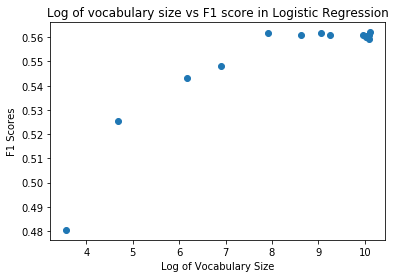

In [305]:
from math import log
def get_vocabulary(coefs):
        '''Return non zero vocabulary'''
            
        # Extract non-zero features
        nonzero_features = map(lambda x: coefs.nonzero()[0],coefs.nonzero()[0])
        nonzero_list = map(lambda x: nonzero_features[x].tolist(), range(len(coefs)))
        nonzero_flat = [i for sublist in nonzero_list for i in sublist]
        
        # extract all of those weights which appear at least once
        nonzero_list = np.unique(nonzero_flat)
        nonzero_vocabulary = [self.vectorizer.get_feature_names()[index] for index in nonzero_list]
        return nonzero_vocabulary

        # Get index of nonzero features
        # nonzero_features = np.unique(np.nonzero(LR_model_L1.coef_)[1])    

        # Extract vocab with nonzero features
        # nonzero_vocabulary = np.array(vectorizer.get_feature_names())[nonzero_features]
    
def P6():
    
    # Keep this random seed here to make comparison easier.
    np.random.seed(0)
    
    ### STUDENT START ###
    
    ##### Train normal 
    # Transform data
    vectorizer = CountVectorizer()
    X_train = vectorizer.fit_transform(train_data)
    X_dev = vectorizer.transform(dev_data)
    vocabulary = pd.DataFrame(vectorizer.get_feature_names())
    
    # Fit L1 model - including nonzero features
    LR_model_L1 = LogisticRegression(penalty='l1', C=0.01)
    LR_model_L1.fit(X_train, train_labels)
    print("The number of nonzero weights with L1 regularization is ", np.count_nonzero(LR_model_L1.coef_))
    print('Size of the vocabulary: ',np.shape(X_train)[1])
    print("L1 - F1-score - normal:", metrics.f1_score(dev_labels,LR_model_L1.predict(X_dev),average='weighted'))
    
    # Fit L2 model - including nonzero features
    LR_model_L2 = LogisticRegression(penalty='l2', C=1.0)
    LR_model_L2.fit(X_train, train_labels)
    print("The number of nonzero weights with L2 regularization is ", np.count_nonzero(LR_model_L2.coef_))
    print('Size of the vocabulary: ',np.shape(X_train)[1])
    print("L2 - F1-score - normal:", metrics.f1_score(dev_labels,LR_model_L2.predict(X_dev),average='weighted'))
    
    ##### Retrain with nonzero features    
    # Learned weights that are not equal to zero
    nonzero_features = np.nonzero(LR_model_L1.coef_)[1].tolist()
    nonzero_unique = np.unique(nonzero_features).tolist()

    # Extract vocab with nonzero features
    vocabulary_nonzero = np.array(vectorizer.get_feature_names())[nonzero_unique]
    
    # Transform data - nonzero features
    vectorizer_nonzero = CountVectorizer(vocabulary = vocabulary_nonzero)
    X_train_non = vectorizer_nonzero.fit_transform(train_data)
    X_dev_non = vectorizer_nonzero.transform(dev_data)
     
    # Fit L2 model - excluding nonzero features
    LR_model_L2 = LogisticRegression(penalty='l2', C=0.5)
    LR_model_L2.fit(X_train_non, train_labels)
    print("The number of nonzero weights with L2 regularization is ", np.count_nonzero(LR_model_L2.coef_))
    print('Size of the vocabulary: ',np.shape(X_train_non)[1])
    print("L2 - F1-score - normal:", metrics.f1_score(dev_labels, LR_model_L2.predict(X_dev_non), average='weighted'))    

    # Initialize Strength Value list 
    Cs = [0.01, 0.02, 0.05, 0.1, 0.25, 0.5, 0.75, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    data = []
    
    # Iterate through different C's
    for strength in Cs:

        # Transform data - full vocabulary
        vectorizer = CountVectorizer()
        X_train = vectorizer.fit_transform(train_data)
        X_dev = vectorizer.transform(dev_data)
        
        # Fit a L1 model
        LR_model_L1 = LogisticRegression(penalty='l1', C=strength, solver='saga', multi_class='multinomial', tol=0.015)
        LR_model_L1.fit(X_train, train_labels)
        number_of_non_zero = np.count_nonzero(LR_model_L1.coef_)
        
        # Learned weights that are not equal to zero
        nonzero_features = np.nonzero(LR_model_L1.coef_)[1].tolist()
        nonzero_unique = np.unique(nonzero_features).tolist()

        # Extract vocab with nonzero features
        vocabulary_nonzero = np.array(vectorizer.get_feature_names())[nonzero_unique]
        
        # Transform data - nonzero features
        vectorizer_nonzero = CountVectorizer(vocabulary = vocabulary_nonzero)
        X_train_non = vectorizer_nonzero.fit_transform(train_data)
        X_dev_non = vectorizer_nonzero.transform(dev_data)
        
        # Fit L2 model
        LR_model_L2 = LogisticRegression(penalty ='l2', C = 0.5, solver='saga', multi_class='multinomial', tol = 0.015)
        LR_model_L2.fit(X_train_non, train_labels)
        f1_score = metrics.f1_score(dev_labels,LR_model_L2.predict(X_dev_non),average='weighted')
        
        data.append([strength,number_of_non_zero,f1_score,np.shape(X_train_non)[1],log(np.shape(X_train_non)[1])])
        
    df = pd.DataFrame(data,columns=['Strength', 'L1 non zero','L2 - F1 Score', 'Vocabulary Size', 'Log of Vocab. size'])
    print(df)    
    
    # Plot 
    plt.figure()
    plt.plot(df['Log of Vocab. size'].tolist(), df['L2 - F1 Score'].tolist(), 'o')
    plt.xlabel('Log of Vocabulary Size')
    plt.ylabel('F1 Scores')
    plt.title('Log of vocabulary size vs F1 score in Logistic Regression')
    
    ### STUDENT END ###

P6()

QUESTION: How does performance of the models based on reduced vocabularies compare to that of a model based on the full vocabulary?

ANSWER: Once the C value is above 0.5 the F1 Score seems to remain more or less constant at approximately 0.56.

### Part 7:

How is `TfidfVectorizer` different than `CountVectorizer`?

Produce a Logistic Regression model based on data represented in tf-idf form, with L2 regularization strength of 100.  Evaluate and show the f1 score.  How is `TfidfVectorizer` different than `CountVectorizer`?

Show the 3 documents with highest R ratio, where ...<br/>
$R\,ratio = maximum\,predicted\,probability \div predicted\,probability\,of\,correct\,label$

Explain what the R ratio describes.  What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

Note:
* Train on the transformed training data.
* Evaluate on the transformed development data.
* You can use `TfidfVectorizer` and its `.fit_transform` method to transform data to tf-idf form.
* You can use `LogisticRegression(C=100, solver="liblinear", multi_class="auto")` to produce a logistic regression model.
* You can use `LogisticRegression`'s `.predict_proba` method to access predicted probabilities.

In [361]:
def P7():
    '''Calculate R ratio of maximum predicted probability over the probability of the correct label
     
    PARAMETERS: 
    - Not applicable
    
    RETURNS: 
    - indices - list of highest R ratio indices
    
    '''
    ### STUDENT START ###
    
    # Transform data
    vectorizer = TfidfVectorizer()
    X_train = vectorizer.fit_transform(train_data)
    X_dev = vectorizer.transform(dev_data)
    
    # Fit model.
    LR_model = LogisticRegression(C=100, solver="liblinear", multi_class="auto")
    LR_model.fit(X_train, train_labels)
    predictions = LR_model.predict(X_dev)
    probabilities = LR_model.predict_proba(X_dev)
    
    # Create R ratios: maximum predicted probability / predicted probability of correct label
    ratio_values = np.array([probabilities[i,predictions[i]]/probabilities[i,dev_labels[i]] for i in range(len(dev_labels))])
    
    # Get top 3 and display results
    indices = ratio_values.argsort()[-3:][::-1]
    for i in indices:
        print("Correct Label: ",newsgroups_train.target_names[dev_labels[i]])
        print("Predicted Label: ",newsgroups_train.target_names[predictions[i]])
        print("Ratio: ", round(ratio_values[i],2))
        print(dev_data[i])
        print('****************************************************')
    
    return indices   
    ### STUDENT END ###

indices = P7()

Correct Label:  talk.religion.misc
Predicted Label:  comp.graphics
Ratio:  929.36
I am pleased to announce that a *revised version* of _The Easy-to-Read Book
of Mormon_ (former title: _Mormon's Book_) by Lynn Matthews Anderson is now
available through anonymous ftp (see information below). In addition to the
change in title, the revised ETR BOM has been shortened by several pages
(eliminating many extraneous "that's" and "of's"), and many (minor) errors
have been corrected. This release includes a simplified Joseph Smith Story,
testimonies of the three and eight witnesses, and a "Words-to-Know"
glossary.

As with the previous announcement, readers are reminded that this is a
not-for-profit endeavor. This is a copyrighted work, but people are welcome
to make *verbatim* copies for personal use. People can recuperate the
actual costs of printing (paper, copy center charges), but may not charge
anything for their time in making copies, or in any way realize a profit
from the use of this bo

QUESTION: How is TfidfVectorizer different than CountVectorizer?

ANSWER: CountVectorizer counts the word frequencies, the Tf-idf (term-frequency times inverse document-frequency) the value increases proportionally to count and it is offset by the frequency of the word vocabulary.

Tfidf Vectorizer limits the impact of words that have high frequency.

QUESTION: What does the R ratio describe? 

ANSWER: 𝑚𝑎𝑥𝑖𝑚𝑢𝑚 𝑝𝑟𝑒𝑑𝑖𝑐𝑡𝑒𝑑 𝑝𝑟𝑜𝑏𝑎𝑏𝑖𝑙𝑖𝑡𝑦 ÷ 𝑝𝑟𝑒𝑑𝑖𝑐𝑡𝑒𝑑 𝑝𝑟𝑜𝑏𝑎𝑏𝑖𝑙𝑖𝑡𝑦 𝑜𝑓 𝑐𝑜𝑟𝑟𝑒𝑐𝑡 𝑙𝑎𝑏𝑒𝑙; i.e. the distance between the probability of the prediction vs the actual probability of the true label. The closer to 1 the ratio the more wrong / far off was the model from the correct answer.

QUESTION: What kinds of mistakes is the model making?

ANSWER: For the first two cases it seems that it weighs the abundance of words relating to 'publishing' higher than the word 'Mormon' despite the fact that it is mentioned three times

SUGGESTION: A way to address one particular issue that you see.

The performance may theoretically improve if we set a minimum threshold. This way the 'publishing' related words will lose some of its importanc as they do not occur as frequently as the word 'Mormon'.

### Part 8 EXTRA CREDIT:

Produce a Logistic Regression model to implement your suggestion from Part 7.

In [363]:
def compare_labels(predictions, probabilities):
    '''Print Correct and Predicted labels for highest R ratio use cases from section 7
     
    PARAMETERS: 
    - predictions - Logistic regression predictions
    - probabilities - Logistic regression probabilities
    
    RETURNS: 
    - Not applicable
    
    '''    
    # Create R ratios: maximum predicted probability / predicted probability of correct label
    ratio_values = np.array([probabilities[i,predictions[i]]/probabilities[i,dev_labels[i]] for i in range(len(dev_labels))])
    
    # Check whether prediction has been corrected
    print('*** EXAMPLE 1 ***')
    print("Correct Label: ",newsgroups_train.target_names[dev_labels[indices[0]]])
    print("Predicted Label: ",newsgroups_train.target_names[predictions[indices[0]]])
    print("Ratio: ", round(ratio_values[indices[0]],2))
    print('*** EXAMPLE 2 ***')
    print("Correct Label: ",newsgroups_train.target_names[dev_labels[indices[1]]])
    print("Predicted Label: ",newsgroups_train.target_names[predictions[indices[1]]])
    print("Ratio: ", round(ratio_values[indices[1]],2))
    print('*** EXAMPLE 3 ***')
    print("Correct Label: ",newsgroups_train.target_names[dev_labels[indices[2]]])
    print("Predicted Label: ",newsgroups_train.target_names[predictions[indices[2]]])
    print("Ratio: ", round(ratio_values[indices[2]],2))
    
def P8():
    '''Vectorize with No, Min and Max threshold for TDIDFVectorizer, fit a LR model and calculate f score
     
    PARAMETERS: 
    - Not applicable
    
    RETURNS: 
    - Not applicable
    
    '''        
    ### STUDENT START ###
    # Transform data
    vectorizer_1 = TfidfVectorizer()
    X_train_1 = vectorizer_1.fit_transform(train_data)
    X_dev_1 = vectorizer_1.transform(dev_data)
    
    # Fit model.
    LR_model_1 = LogisticRegression(C=100, solver="liblinear", multi_class="auto")
    LR_model_1.fit(X_train_1, train_labels)
    predictions_1 = LR_model_1.predict(X_dev_1)
    probabilities_1 = LR_model_1.predict_proba(X_dev_1)
    f_score_1 = metrics.f1_score(dev_labels, predictions_1, average='weighted')
    print("F Score with TFIDF Vectorizer: ",round(f_score_1,3))
    
    print('')
    print('#######################')
    print('')
    # Transform data - adjust TDIDF min thresholds
    vectorizer_2 = TfidfVectorizer(min_df=2, strip_accents='unicode', stop_words='english')
    X_train_2 = vectorizer_2.fit_transform(train_data)
    X_dev_2 = vectorizer_2.transform(dev_data)
    
    # Fit Updated model
    LR_model_2 = LogisticRegression(C=100, solver="liblinear", multi_class="auto")
    LR_model_2.fit(X_train_2, train_labels)
    predictions_2 = LR_model_2.predict(X_dev_2)
    probabilities_2 = LR_model_2.predict_proba(X_dev_2)
    f_score_2 = metrics.f1_score(dev_labels, predictions_2, average='weighted')
    print("F Score with TFIDF Vectorizer Min Threshold of 2: ",round(f_score_2,3))
    
    compare_labels(predictions_2, probabilities_2)
    
    print('')
    print('#######################')
    print('')
    
    # Transform data - adjust TDIDF max thresholds
    vectorizer_3 = TfidfVectorizer(max_df=94, strip_accents='unicode', stop_words='english')
    X_train_3 = vectorizer_3.fit_transform(train_data)
    X_dev_3 = vectorizer_3.transform(dev_data)
    
    # Fit Updated model
    LR_model_3 = LogisticRegression(C=100, solver="liblinear", multi_class="auto")
    LR_model_3.fit(X_train_3, train_labels)
    predictions_3 = LR_model_3.predict(X_dev_3)
    probabilities_3 = LR_model_3.predict_proba(X_dev_3)
    f_score_3 = metrics.f1_score(dev_labels, predictions_3, average='weighted')
    print("F Score with TFIDF Vectorizer Max Threshold of 94: ",round(f_score_3,3))
    
    compare_labels(predictions_3, probabilities_3)
      
    ### STUDENT END ###

P8()

F Score with TFIDF Vectorizer:  0.76

#######################

F Score with TFIDF Vectorizer Min Threshold of 2:  0.771
*** EXAMPLE 1 ***
Correct Label:  talk.religion.misc
Predicted Label:  comp.graphics
Ratio:  2573.61
*** EXAMPLE 2 ***
Correct Label:  talk.religion.misc
Predicted Label:  comp.graphics
Ratio:  188.38
*** EXAMPLE 3 ***
Correct Label:  alt.atheism
Predicted Label:  talk.religion.misc
Ratio:  464.7

#######################

F Score with TFIDF Vectorizer Max Threshold of 94:  0.783
*** EXAMPLE 1 ***
Correct Label:  talk.religion.misc
Predicted Label:  comp.graphics
Ratio:  719.41
*** EXAMPLE 2 ***
Correct Label:  talk.religion.misc
Predicted Label:  comp.graphics
Ratio:  280.6
*** EXAMPLE 3 ***
Correct Label:  alt.atheism
Predicted Label:  talk.religion.misc
Ratio:  167.85


I was able to improve performance using the min and max thresholds. However it did not help with the specific case identified in section 7. The labels for the high R Ratio cases remain incorrect.

What is interesting is the R ratio. It seems that the min threshold while it has improved the F score overall for the specific cases it had a definite adverse impact (example r ration increasing from 929.36 to 2573.61.

While the impact of max threshold is positive on both the f score as well as the ratio.